Author: Sanath H Patil

Environment: Python 3.6.1 and Jupyter notebook

Libraries used: Main libraries used in the project:

   - sklearn for Implepenting various models
   - pandas(for creating dataframes, included in Anaconda Python 3.6)
   - numpy(for numeric calculations, included in Anaconda Python 3.6)
   - matplotlib(for plotting dataframes, included in Anaconda Python 3.6)
   - datetime(for verifying date time, included in Anaconda Python 3.6)
   - re (for regular expression, included in Anaconda Python 3.6)
   - seaborn(for plotting graphs, included in Anaconda Python 3.6)
   - Few images are captured from Tableau
   - math(to perform calculation, included in Anaconda Python 3.6)
   - warnings (to ignore any warnings thrown while execution, included in Anaconda Python 3.6) 

# Content

## 1- Libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore")

## 2- Read the csv file

In [2]:
dataset = pd.read_csv("Drone.csv")
data = dataset.copy()

## 3- Exploring Dataframe:

## 3-1 Information of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37057 entries, 0 to 37056
Data columns (total 16 columns):
Id                       37034 non-null object
Drone Type               37047 non-null float64
Post Type                37037 non-null float64
Package Weight           37057 non-null float64
Origin Region            37047 non-null float64
Destination Region       37047 non-null float64
Origin Latitude          37057 non-null float64
Origin Longitude         37057 non-null float64
Destination Latitude     37057 non-null float64
Destination Longitude    37057 non-null float64
Journey Distance         37057 non-null float64
Departure Date           37057 non-null object
Departure Time           37057 non-null object
Travel Time              37017 non-null float64
Delivery Time            37057 non-null object
Delivery Fare            37027 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.5+ MB


## 3-2 Diplaying the count of null values for each feature in the dataset

In [4]:
data.isnull().sum()

Id                       23
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

# Data Preparation

## 4- Dropping  Id = Null and duplicates

## 4-1 Removing the Null valued rows from the Id column - the Null Id values is of no use for modelling

In [5]:
data = data[~data['Id'].isnull()]
data[data['Id'].isnull()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


-----------------------

## 4-2 Handling duplicated data

In [6]:
# Duplicate data displayed
data[data.duplicated()].head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
36997,ID1410430687,1.0,0.0,7.451,44.0,27.0,-38.274392,144.512561,-37.864361,145.168159,73.377,2018-04-26,11:47:59,79.88,13:07:51,84.89
37000,ID1512056266,1.0,0.0,44.291,3.0,26.0,-38.435257,145.536423,-37.707011,147.229934,169.102,2018-06-12,07:01:56,175.60,9:57:31,94.52
37001,ID1687471250,1.0,0.0,39.177,48.0,24.0,-37.112288,148.309202,-36.741505,143.309876,446.734,2018-04-31,20:05:01,453.23,3:38:14,135.79
37002,ID5651048390,1.0,1.0,25.860,21.0,27.0,-37.951562,144.487708,-38.007377,145.151683,58.590,2018-06-06,06:57:30,65.09,8:02:35,123.54
37003,ID1455239185,3.0,0.0,27.200,25.0,11.0,-37.060611,145.928476,-37.358933,144.239097,153.408,2018-01-16,13:34:45,134.58,15:49:19,179.55


In [7]:
data.drop_duplicates(subset=None, keep='first', inplace=True)
data[data.duplicated()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


----------------

# 5 - Cleaning Departure Date

From EDA, Date variable has 3 errors:

   - Date format error
   - February month ending with 30
   - Months wrongly ending with day 31


In [8]:
import datetime

date_string = data['Departure Date']
date_format = '%Y-%m-%d'
date_issue = []
for i in date_string:
    try:
        date_obj = datetime.datetime.strptime(i, date_format)
        
        #print(date_obj)
    except ValueError:
        date_issue.append(i) 
#         print(i)

## Regular Expressions are used to handle the date errors

In [9]:
def cleanup(date):
    PATTERNS = [
    # 1) Day and month swap if month is greater than 12
    r'(\d{4})-(1[3-9]|2[0-9]|3[0-1])-(\d{1,2})',
    # 2) Feb month
    r'(\d{4})-(02|2)-(\d{1,2})',
    # 3) day exceeds month limit
    r'(\d{4})-(04|4|6|06|9|09|11)-(31)']

    PATTERNS = [re.compile(p) for p in PATTERNS]

    if type(date) != str:
        date = str(date)
    for i, p in enumerate(PATTERNS):
        res = p.match(date)
#         print(res)
        if res and i == 0:
            return f'{res[1]}-{res[3]}-{res[2]}'
            
        if res and i == 1:
            return f'{res[1]}-{res[2]}-{int(res[3])-2 if int(res[3])==30 else int(res[3])-3}'

        if res and i == 2:
            return f'{res[1]}-{res[2]}-{int(res[3]) - 1}'
        
        else:
#             print("entered else")
            continue

In [10]:
date_fix = []
for i in date_issue:
    date_fix .append(cleanup(i))

In [11]:
import datetime

date_string = data['Departure Date']
date_format = '%Y-%m-%d'
fixed_date = []
count = 0
for i in date_string:
    fix = []
    try:
        date_obj = datetime.datetime.strptime(i, date_format)
        fixed_date.append(i)
        #print(date_obj)
    except ValueError:
        fix = cleanup(i)
        fixed_date.append(fix)
#         print(i)
    count+=1
print(count)

36997


In [12]:
data["Departure Date"] = pd.to_datetime(fixed_date, format = '%Y-%m-%d')

---------------------

# 6- Destination Latitude and Longitude fix

## Some of the latitude and longitude values have incorrect format as represented below:

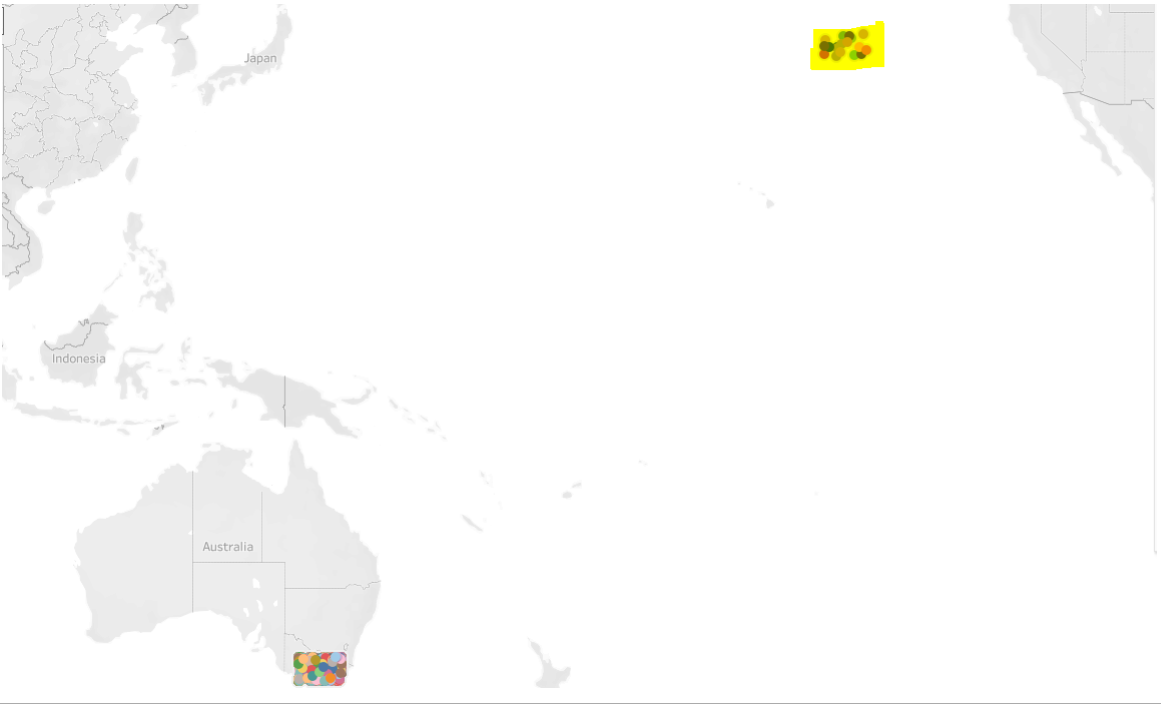

## 6-1 Destination Latitude Fix

In [13]:
def convert_pos_to_neg(data):
    x = []
    for i in data:

                
        if (i > 0):
            i = i*-1
            x.append(i)
            
        elif (i < 0):
            x.append(i)
            
        else:
            print(i)
            
    return x

In [14]:
dest_lat = data.iloc[:, 8:9].values
converted_dest_lat = convert_pos_to_neg(dest_lat)
data["Destination Latitude"] = converted_dest_lat
pd.options.display.float_format = "{:,.6f}".format
data["Destination Latitude"] = data["Destination Latitude"].astype(float)

In [15]:
data[data.iloc[:,8:9].values>0]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


## 6-2 Destination Longitude Fix

In [16]:
def convert_neg_to_pos(data):
    x = []
    for i in data:

                
        if (i > 0):
            x.append(i)
            
        elif (i < 0):
            i = abs(i)
            x.append(i)
            
        else:
            print(i)
            
    return x

In [17]:
dest_long = data.iloc[:, 9:10].values
converted_dest_long = convert_neg_to_pos(dest_long)
data["Destination Longitude"] = converted_dest_long
pd.options.display.float_format = "{:,.6f}".format
data["Destination Longitude"] = data["Destination Longitude"].astype(float)

In [18]:
data[data.iloc[:, 9:10].values < 0]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


# 7- Origin Latitude and Longitude Fix

## 7-1 Origin Latitude fix:

In [19]:
converted_origin_lat = convert_pos_to_neg(data.iloc[:,6:7].values)

data["Origin Latitude"] = converted_origin_lat
data["Origin Latitude"] = data["Origin Latitude"].astype(float)
pd.options.display.float_format = "{:,.6f}".format

In [20]:
data[data.iloc[:,6:7].values >0]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


## 7-2 Origin Longitude fix

In [21]:
converted_orign_long = convert_neg_to_pos(data.iloc[:,7:8].values)

In [22]:
data["Origin Longitude"] = converted_orign_long
data["Origin Longitude"] = data["Origin Longitude"].astype(float)
pd.options.display.float_format = "{:,.6f}".format

-----------------

# 8- Post type fix

 Observation: The data set consists of 20 Post Type null values, looking at the below screenshot we conclude that most of the ID's starting with 1 have Post Type as 0 and ID's starting with 5 have Post Type as 1

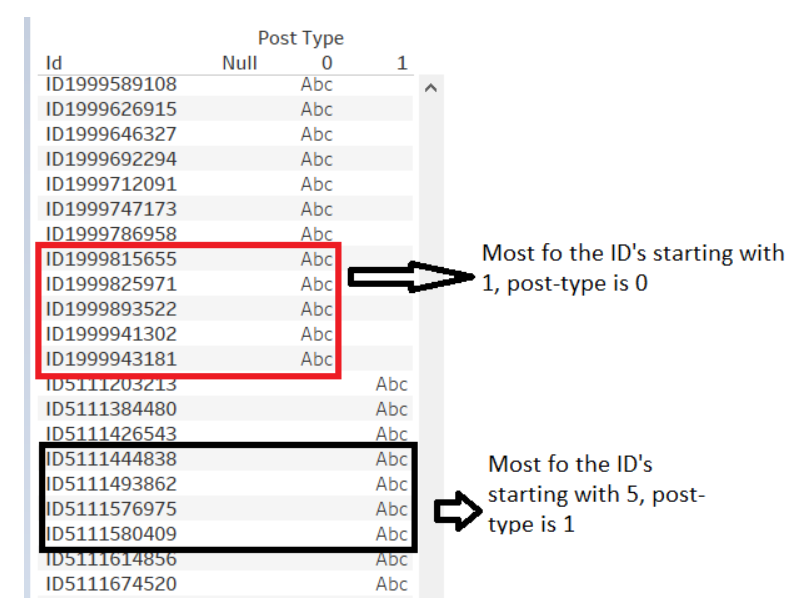

In [23]:
def clean_Post_Type(id_data):
    if re.match("ID5",id_data):
        return 1.0
    else:
        return 0.0
    
data['Post Type'] = data['Id'].apply(lambda each_row: clean_Post_Type(each_row)\
                                           if(str(each_row) != 'nan') else each_row)

-----

## 9 -Validating the Journey Distance using Earth radius and Haversine formula

In [24]:
from math import sin, cos, sqrt, atan2, radians

def fix_dist(o_lat,o_lon,d_lat,d_lon):

    R = 6378.0
#     print(o_lat)
#     print(o_lon)
#     print(d_lat)
#     print(d_lon)

    lat1 = radians(o_lat)
    lon1 = radians(o_lon)
    lat2 = radians(d_lat)
    lon2 = radians(d_lon)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distance = round(distance,3)
    return distance

In [25]:
test_df = data.copy()

test_df['New_Distance'] = test_df.apply(
    lambda row: pd.Series(fix_dist(row['Origin Latitude'], row['Origin Longitude'],row['Destination Latitude'],\
                                   row['Destination Longitude'])), axis=1)

In [26]:
test_df[round(test_df['Journey Distance'],2) != round(test_df['New_Distance'],2) ][['Id','Journey Distance','New_Distance']]

,Id,Journey Distance,New_Distance
4297,ID1914453733,350.871000,345.071000
4321,ID1344783067,167.685000,170.585000
5157,ID1652809906,282.821000,284.921000
5804,ID1437571294,387.640000,383.940000
8394,ID5907496437,47.548000,38.348000
12322,ID1724446678,124.620000,118.920000
14030,ID1949877322,244.918000,241.618000
14545,ID1990830084,110.668000,102.768000
16578,ID1829116263,238.266000,234.266000
18650,ID1716695648,380.373000,376.873000


##  Journey Distance - 14 wrong values : moving forward, New_Distance is used  with correct values

----

## 10- Origin Region

## 10-1 Detecting and addressing Outliers for Origin Latitude and Longitude w.r.t Origin Region

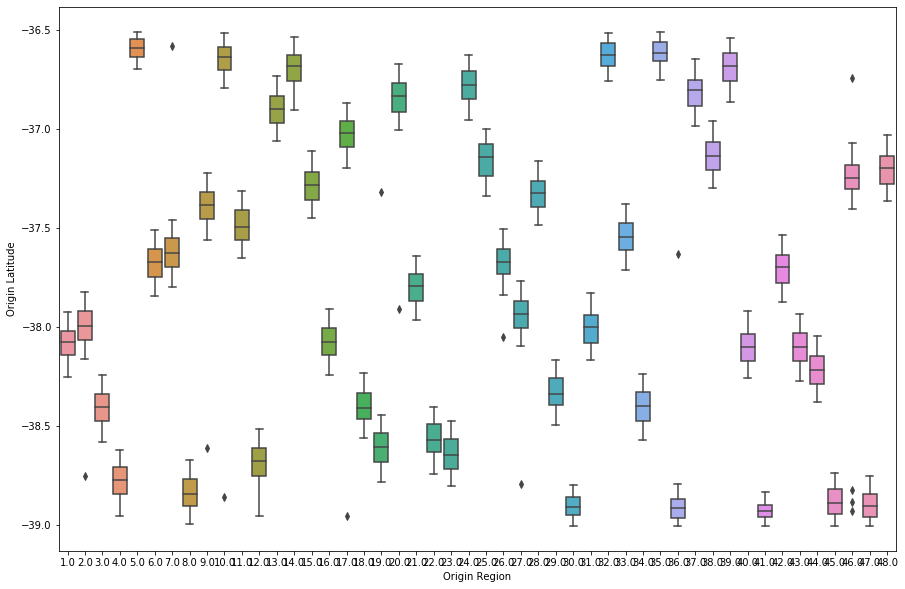

In [27]:
plt.rcParams['figure.figsize']=15,10
xi=test_df[['Origin Latitude','Origin Longitude','Origin Region']]
sns.boxplot(data=xi,x='Origin Region',y='Origin Latitude')

## 10-2 Outlier finder - Inter Quartile Range (IQR)

In [28]:
def treat_outliers(region_no,sample_df,option):
#     outliers_df = test_df[['Origin Latitude','Origin Longitude','Origin Region']]

    sample_df=sample_df.copy()
    if option == "Origin":
        
        sample_df = sample_df[sample_df['Origin Region']==region_no]
        
    else:
        sample_df = sample_df[sample_df['Destination Region']==region_no]
    
    Q1 = sample_df.quantile(0.25)
    Q3 = sample_df.quantile(0.75)
    IQR = Q3 - Q1
#     print(IQR)

    try:
        #clean
        clean = sample_df[~((sample_df < (Q1 - 1.5 * IQR)) |(sample_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#         print(clean)
        #outlier
        outliers = sample_df[((sample_df < (Q1 - 1.5 * IQR)) |(sample_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#         print(outliers)

    except :
        print(region_no)
        
    return clean,outliers

## For loop to seperate the clean data from outliers and storing them seperately

In [29]:
def final_fix_regions(regions_list,sample_df,option):
    sample_df=sample_df.copy()
    final_cleaned_df=pd.DataFrame()
    final_outlier_df=pd.DataFrame()

    for i in regions_list:
        cleaned_df,outlier_df = treat_outliers(i,sample_df,option)
    #     print(i)
        final_cleaned_df= pd.concat([final_cleaned_df,cleaned_df])
        final_outlier_df= pd.concat([final_outlier_df,outlier_df])
        
    return final_cleaned_df,final_outlier_df

## 10-3 Separate Outlier and Clean data in Origion region

In [30]:
# for loop, appending dataframe
main_origin_df = test_df[['Origin Latitude','Origin Longitude','Origin Region']]
origin_regions_list = main_origin_df[~main_origin_df['Origin Region'].isnull()]['Origin Region'].unique().tolist()

origin_regions_list = [int(each_number) for each_number in origin_regions_list]


#result
origin_option="Origin"
Origin_cleaned_df,Origin_outlier_df = final_fix_regions(origin_regions_list,main_origin_df,origin_option)



## 10-4 Finally appending the Nan values from the data to outliers so it can be further treated

In [31]:
nan_values = main_origin_df[main_origin_df['Origin Region'].isnull()]
Origin_outlier_df = pd.concat([Origin_outlier_df,nan_values]) 

In [32]:
Origin_cleaned_df.head()

,Origin Latitude,Origin Longitude,Origin Region
0,-37.543231,146.694631,9.000000
88,-37.455333,146.822500,9.000000
116,-37.271781,146.673656,9.000000
141,-37.382014,146.766553,9.000000
177,-37.283540,146.715999,9.000000


In [33]:
Origin_outlier_df.head()

,Origin Latitude,Origin Longitude,Origin Region
26896,-38.611055,143.460159,9.000000
31442,-37.365451,144.105447,9.000000
5161,-38.020598,145.273632,1.000000
8462,-37.955790,144.996391,1.000000
30999,-36.902461,145.771817,14.000000


## 10-5 Applying K-NN algorithm (classification Technique) to train the model from clean data and predict the values for  the outliers and Nan values

## Training K-NN algorithm on Origin clean data

In [34]:
x_train = Origin_cleaned_df[["Origin Latitude","Origin Longitude"]].values
y_train = Origin_cleaned_df[["Origin Region"]].values

x_test = Origin_outlier_df[["Origin Latitude","Origin Longitude"]].values
# Filling the Nan values with 0 
Origin_outlier_df[["Origin Region"]] = Origin_outlier_df[["Origin Region"]].fillna(0)
y_test = Origin_outlier_df[["Origin Region"]].values

## 10-6 Finding the optimum -K value through Grid Search method

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

## The optimal K value according to Grid Search is K = 9. Therefore, training the model(Origin - clean data) with K=9

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p =2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

## 10-7 Predicting the Origin test_set values

In [37]:
y_pred = classifier.predict(x_test)
# comparing predicted result with x_test result
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12.  9.]
 [11.  9.]
 [27.  1.]
 [27.  1.]
 [37. 14.]
 [47. 12.]
 [ 5.  7.]
 [36. 10.]
 [11. 19.]
 [42. 36.]
 [ 1. 26.]
 [ 8.  2.]
 [41. 17.]
 [ 2. 20.]
 [39. 20.]
 [ 4. 46.]
 [20. 46.]
 [47. 46.]
 [30. 46.]
 [23. 27.]
 [29.  0.]
 [38.  0.]
 [13.  0.]
 [41.  0.]
 [39.  0.]
 [ 5.  0.]
 [27.  0.]
 [14.  0.]
 [32.  0.]
 [28.  0.]]


In [38]:
fixed_Origin_outlier_df = Origin_outlier_df.copy()
fixed_Origin_outlier_df["Origin Region"] = pd.Series(y_pred).values

In [39]:
fixed_Origin_outlier_df.head()

,Origin Latitude,Origin Longitude,Origin Region
26896,-38.611055,143.460159,12.000000
31442,-37.365451,144.105447,11.000000
5161,-38.020598,145.273632,27.000000
8462,-37.955790,144.996391,27.000000
30999,-36.902461,145.771817,37.000000


## Combining the fixed outlier with the clean dataset

In [40]:
test_df[["Origin Latitude","Origin Longitude","Origin Region"]] = pd.concat([Origin_cleaned_df,fixed_Origin_outlier_df])

## 10-8 Similarly the same procedure is followed to fix the Outliers for Destination Region

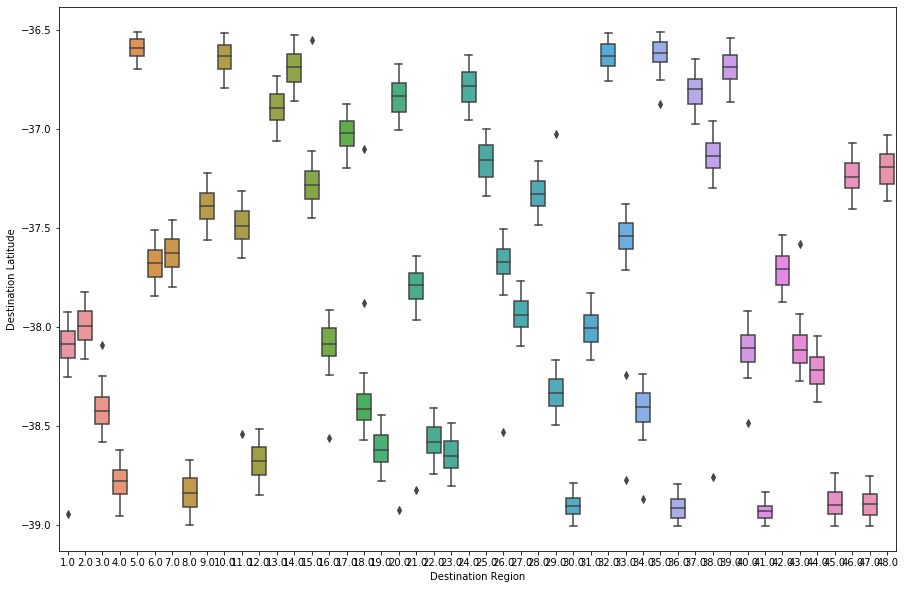

In [41]:
plt.rcParams['figure.figsize']=15,10
xi=test_df[['Destination Latitude','Destination Longitude','Destination Region']]
sns.boxplot(data=xi,x='Destination Region',y='Destination Latitude')

In [42]:
# for loop, appending dataframe
main_destination_df = test_df[['Destination Latitude','Destination Longitude','Destination Region']]
destination_regions_list = main_destination_df[~main_destination_df['Destination Region'].isnull()]['Destination Region'].unique().tolist()

destination_regions_list = [int(each_number) for each_number in destination_regions_list]


#result
Destination_option="Destination"
Destination_cleaned_df,Destination_outlier_df = final_fix_regions(destination_regions_list,main_destination_df,Destination_option)

In [43]:
Destination_cleaned_df.head()

,Destination Latitude,Destination Longitude,Destination Region
0,-38.688709,147.836706,8.000000
152,-38.940284,147.933297,8.000000
154,-38.939806,148.050175,8.000000
182,-38.701933,147.957402,8.000000
217,-38.844162,148.150121,8.000000


## Appending Nan values to Destination_outlier_df

In [44]:
nan_values = main_destination_df[main_destination_df['Destination Region'].isnull()]
Destination_outlier_df = pd.concat([Destination_outlier_df,nan_values]) 

In [45]:
Destination_outlier_df.head()

,Destination Latitude,Destination Longitude,Destination Region
6445,-37.578957,145.371221,43.000000
8505,-38.539133,147.144486,11.000000
24901,-38.091929,148.330638,3.000000
26948,-36.548344,147.935812,15.000000
21415,-36.871746,145.619935,35.000000


## 10-9 Training KNN model on clean Destination df to predict the outlier Destination df

In [46]:
X_train = Destination_cleaned_df[["Destination Latitude","Destination Longitude"]].values
Y_train = Destination_cleaned_df[["Destination Region"]].values

X_test = Destination_outlier_df[["Destination Latitude","Destination Longitude"]].values
# Filling the Nan values with 0 
Destination_outlier_df[["Destination Region"]] = Destination_outlier_df[["Destination Region"]].fillna(0)
Y_test = Destination_outlier_df[["Destination Region"]].values

## Grid search to find Optimal K value

In [47]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 9}

## Optimal K value = 9

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p =2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

## 10-10 Predicting the test set values

In [49]:
Y_pred = classifier.predict(X_test)
# comparing predicted result with x_test result
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[33. 43.]
 [19. 11.]
 [40.  3.]
 [ 5. 15.]
 [37. 35.]
 [20. 35.]
 [ 1. 33.]
 [ 8. 33.]
 [22. 26.]
 [46. 18.]
 [ 2. 18.]
 [34. 40.]
 [41.  1.]
 [ 4. 38.]
 [36. 20.]
 [19. 22.]
 [30. 34.]
 [47. 21.]
 [25. 29.]
 [12. 16.]
 [48.  0.]
 [24.  0.]
 [32.  0.]
 [36.  0.]
 [40.  0.]
 [26.  0.]
 [47.  0.]
 [39.  0.]
 [45.  0.]
 [36.  0.]]


In [50]:
fixed_Destination_outlier_df = Destination_outlier_df.copy()
fixed_Destination_outlier_df["Destination Region"] = pd.Series(Y_pred).values

In [51]:
fixed_Destination_outlier_df.head()

,Destination Latitude,Destination Longitude,Destination Region
6445,-37.578957,145.371221,33.000000
8505,-38.539133,147.144486,19.000000
24901,-38.091929,148.330638,40.000000
26948,-36.548344,147.935812,5.000000
21415,-36.871746,145.619935,37.000000


## Combining the fixed destination outliers with cleaned data

In [52]:
test_df[["Destination Latitude","Destination Longitude","Destination Region"]] = pd.concat([Destination_cleaned_df,fixed_Destination_outlier_df])

In [53]:
test_df.drop(['Journey Distance'], axis=1, inplace=True)
test_df.rename(columns={'New_Distance':'Journey Distance'}, inplace=True)

# 11 -Travel Time fix
 Issues:
  - Null Values
  - delivery time is earlier to departure time
  - Wrong given time

In [54]:
timedf = test_df[['Id','Drone Type','Departure Time','Delivery Time','Journey Distance','Travel Time']]

In [55]:
print("There are {} null vales present in 'Travel Time column'".format(len(timedf[timedf['Travel Time'].isnull()])))

There are 40 null vales present in 'Travel Time column'


In [56]:
def cal_traveltime(data1,data2):
    t1 = sum(i*j for i, j in zip(map(int, data1.split(':')), [60, 1, 1/60]))
    t2 = sum(i*j for i, j in zip(map(int, data2.split(':')), [60, 1, 1/60]))
    return round((t2-t1),2)
 


timedf['diff_Del&Dep']=timedf.apply(lambda x: cal_traveltime(x['Departure Time'],x['Delivery Time']),axis=1)


def find_valid(data1,data2):
    #Adding a tolerance level of 0.01  & 0.02 
    if (data1 == round(data2+0.01,2)) | (data1 == data2) | (data1 == round(data2+0.02,2)):
        return data1

    
timedf['valid_traveltime']=timedf.apply(lambda x:find_valid(x['Travel Time'],x['diff_Del&Dep']),axis=1 )


# #####

timedf['time_diff']= pd.to_timedelta(timedf['Delivery Time'])-pd.to_timedelta(timedf['Departure Time'])
timedf['time_diff'] = pd.to_timedelta(timedf['time_diff'].dt.seconds, unit='s')
timedf['time'] = timedf['time_diff'] / np.timedelta64(1, 'h')

# # # below step will find which time is less than 15hrs, this is a valid time
timedf['valid_traveltime']=timedf.apply(lambda x:x['Travel Time'] if x['time']<15 else None,axis=1 )

In [57]:
# 2. Finding invalid data

valid_traveltime=timedf[timedf['valid_traveltime'].notnull()]
invalid_traveltime=timedf[timedf['valid_traveltime'].isnull()]

In [58]:
#Dropping all unwanted columns

valid_traveltime.drop(['diff_Del&Dep','valid_traveltime','time_diff','time'], axis=1, inplace=True)
invalid_traveltime.drop(['diff_Del&Dep','valid_traveltime','time_diff','time'], axis=1, inplace=True)

In [59]:

# Forming 6 dataframe of different Drone type

valid_traveltime_drone1=valid_traveltime[valid_traveltime['Drone Type']==1.0]
invalid_traveltime_drone1=invalid_traveltime[invalid_traveltime['Drone Type']==1.0]


valid_traveltime_drone2=valid_traveltime[valid_traveltime['Drone Type']==2.0]
invalid_traveltime_drone2=invalid_traveltime[invalid_traveltime['Drone Type']==2.0]


valid_traveltime_drone3=valid_traveltime[valid_traveltime['Drone Type']==3.0]
invalid_traveltime_drone3=invalid_traveltime[invalid_traveltime['Drone Type']==3.0]


# At this step, data is cleaned with outliers, which is required for next steps

Below method explains how travel time is calculated by solving simultaneous equations


W.K.T
x ->speed of takeoff

y -> speed of landing

z -> speed of onroute

t -> time taken

d -> distance travelled




5x+5y= $\beta$ ------> Treat this as beta. Beta here conveys information on= Distance travelled during takeoff and landing


Then main equation becomes, beta + on route distance = journey distance
on route distance = time taken (t-10) * speed (z)



$\beta$+(t-10)z=d -----------> (main eqn)

let actual time t=393.21 and travelled distance d=386.712 then main eqn becomes:


* $\beta$+(396.91-10)z=390.409 -----------> (eqn-1)

let t=176.72 and d=390.409 then main eqn becomes:



* $\beta$+(176.72-10)z=170.223 -----------> (eqn-2)
Solving eq-1 and eq-2: we get

z(speed of drone type 1) = 60 km/hr

beta = 210.36

In [60]:
# a common function to calcualte z and beta for different drone types 
# beta + (t-10)/60 = d
def linear_eqn(t1,t2,d1,d2):
#     d1,t1,d2,t2
    t1 = (t1 - 10) / 60
    t2 = (t2 - 10) / 60
    
    
    A = np.array([[1/60,t1], [1/60, t2]])
    B = np.array([d1, d2])
    X = np.linalg.solve(A,B)
    
    
    beta = X[0]
    z = X[1]
    #print(beta)
    #print(z)
    return round(beta,2), round(z,2)

#beta1,speed1 = linear_eqn(348.893000,355.390000,297.451000,303.950000)
#beta2,speed2 = linear_eqn(148.845000,144.010000,143.882000,139.430000)
#beta3,speed3 = linear_eqn(378.269000,321.960000,298.795000,255.730000)

beta1,speed1=linear_eqn(396.91,176.72,390.409,170.223)
beta2,speed2=linear_eqn(144.01,122.85,148.845,125.922)
beta3,speed3=linear_eqn(186.23,255.73,215.387,298.795)

print("Speed of Drone type-1={}, beta1={}".format(speed1,beta1))
print("Speed of Drone type-2={}, beta2={}".format(speed2,beta2))
print("Speed of Drone type-3={}, beta3={}".format(speed3,beta3))

Speed of Drone type-1=60.0, beta1=210.36
Speed of Drone type-2=65.0, beta2=220.18
Speed of Drone type-3=72.01, beta3=233.44


In [61]:
def calculate_time(dist,beta,speed):
    time_taken=(((dist*60)-(beta))/speed)+10
    return round(time_taken,2)

## Concatenatng valid and Invalid data of drone 1 to verify the Drone type

## 11-1 Identifying wrong Travel time
 Here, In drone type 1, there are outliers, where mismatch is present.
 Expected result : given travel time of drone type 1 should be equal to calculated timetaken_drone1
 Actual result : given travel time of drone type 1 is not equal to calculated timetaken_drone1, instead equal to   timetaken_drone2 for below highlighted scenario
## Solution:

   - The time taken by drone 2 is the new travel time
   - Drone type will be 2, since drone-type 2 was approximate to given travel time


## Drone Type : 1

In [62]:
new_drone1=pd.concat([valid_traveltime_drone1,invalid_traveltime_drone1])
new_drone1['TimeTaken_drone1']=new_drone1.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                                     beta1,speed1),axis=1)

new_drone1['TimeTaken_drone2']=new_drone1.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                             beta2,speed2),axis=1)
new_drone1['TimeTaken_drone3']=new_drone1.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                             beta3,speed3),axis=1)

In [63]:
#Below method cleans the invalid drone type

valid_drone1 = new_drone1.copy()

def correct_dronetype(traveltime,timetaken_drone1,timetaken_drone2,timetaken_drone3):
    if (traveltime == timetaken_drone1) | (traveltime == round((timetaken_drone1+0.01),2))|(traveltime == round((timetaken_drone1-0.01),2)):
        return 1.0
    elif (traveltime == timetaken_drone2) | (traveltime == round((timetaken_drone2+0.01),2))|(traveltime == round((timetaken_drone2-0.01),2)):
        return 2.0
    else:
        return 3.0
    
sample_df1=valid_drone1[valid_drone1['Travel Time'] < valid_drone1['TimeTaken_drone1']]
sample_df1['new']=sample_df1.apply(lambda x: correct_dronetype(x['Travel Time'],\
                                                               x['TimeTaken_drone1'],\
                                                               x['TimeTaken_drone2'],x['TimeTaken_drone3']),axis=1)
sample_df1.drop(['Drone Type','TimeTaken_drone1'], axis=1, inplace=True)
sample_df1.rename(columns={'Travel Time':'TimeTaken_drone1','new':'Drone Type'}, inplace=True)    


valid_drone1.update(sample_df1)
valid_drone1.drop(['Travel Time','TimeTaken_drone2','TimeTaken_drone3'], axis=1, inplace=True)
valid_drone1.rename(columns={'TimeTaken_drone1':'Travel Time'}, inplace=True)

## 11-2 Drone Type 2:

In [64]:
new_drone2=pd.concat([valid_traveltime_drone2,invalid_traveltime_drone2])
new_drone2['TimeTaken_drone1']=new_drone2.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                                     beta1,speed1),axis=1)

new_drone2['TimeTaken_drone2']=new_drone2.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                             beta2,speed2),axis=1)
new_drone2['TimeTaken_drone3']=new_drone2.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                             beta3,speed3),axis=1)

In [65]:
valid_drone2 = new_drone2.copy()

sample_df2=valid_drone2[valid_drone2['Travel Time'] < valid_drone2['TimeTaken_drone2']]

sample_df2['new']=sample_df2.apply(lambda x: correct_dronetype(x['Travel Time'],\
                                                               x['TimeTaken_drone1'],\
                                                               x['TimeTaken_drone2'],x['TimeTaken_drone3']),axis=1)
sample_df2.drop(['Drone Type','TimeTaken_drone2'], axis=1, inplace=True)
sample_df2.rename(columns={'Travel Time':'TimeTaken_drone2','new':'Drone Type'}, inplace=True)

In [66]:
valid_drone2.update(sample_df2)
valid_drone2.drop(['Travel Time','TimeTaken_drone1','TimeTaken_drone3'], axis=1, inplace=True)
valid_drone2.rename(columns={'TimeTaken_drone2':'Travel Time'}, inplace=True)

## 11-3 Drone Type 3:

In [67]:
new_drone3=pd.concat([valid_traveltime_drone3,invalid_traveltime_drone3])
new_drone3['TimeTaken_drone1']=new_drone3.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                                     beta1,speed1),axis=1)

new_drone3['TimeTaken_drone2']=new_drone3.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                             beta2,speed2),axis=1)
new_drone3['TimeTaken_drone3']=new_drone3.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                             beta3,speed3),axis=1)

In [68]:
new_drone3.drop(['Travel Time','TimeTaken_drone1','TimeTaken_drone2'], axis=1, inplace=True)
new_drone3.rename(columns={'TimeTaken_drone3':'Travel Time'}, inplace=True)

fixed_travel_time_df = pd.concat([valid_drone1,valid_drone2,new_drone3])

## Updating the df after fixing the Travel time, moving forward new_test_df is the main df

In [69]:
new_test_df = test_df.copy()

new_test_df.update(fixed_travel_time_df)

----------------

## 11-4 Fixing Drone Type Null

## Below step confirms total 10 nulls are present for Drone Type

## Approach:

   - Find the 3 travel time, for respective drone type
   - Identify which given travel time is equal to calculated drone time
   - fill the Drone type


In [70]:
sample_nulldrone_df=new_test_df[new_test_df['Drone Type'].isnull()]


sample_nulldrone_df['TimeTaken_drone1']=test_df.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                               beta1,speed1),axis=1)
sample_nulldrone_df['TimeTaken_drone2']=test_df.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                               beta2,speed2),axis=1)
sample_nulldrone_df['TimeTaken_drone3']=test_df.apply(lambda x: calculate_time(x['Journey Distance'],\
                                                                               beta3,speed3),axis=1)

In [71]:
sample_nulldrone_df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Journey Distance,TimeTaken_drone1,TimeTaken_drone2,TimeTaken_drone3
10256,ID1689462474,nan,0.000000,38.730000,1.000000,32.000000,-38.000643,143.012318,-36.580651,144.346774,2018-07-04,21:50:45,203.860000,1:14:36,129.510000,197.359000,203.850000,188.790000,171.200000
10257,ID5511472926,nan,1.000000,7.014000,30.000000,8.000000,-38.812843,145.772320,-38.748193,147.780859,2018-01-01,09:00:16,180.940000,12:01:12,125.030000,174.441000,180.940000,167.640000,152.110000
11948,ID1552068389,nan,0.000000,25.001000,47.000000,35.000000,-38.993994,146.840822,-36.520589,146.834872,2018-04-08,04:27:53,260.770000,8:48:39,168.750000,275.333000,281.830000,260.770000,236.170000
16386,ID1290005525,nan,0.000000,22.509000,22.000000,26.000000,-38.620436,146.014703,-37.674191,146.920840,2018-07-11,23:37:55,138.360000,1:56:16,133.610000,131.860000,138.350000,128.330000,116.630000
16390,ID1428962469,nan,0.000000,39.640000,48.000000,17.000000,-37.032702,148.407498,-37.108120,144.216866,2018-02-10,17:35:12,350.250000,23:25:27,164.860000,372.274000,378.770000,350.250000,316.940000


In [72]:
sample_nulldrone_df['new']=sample_nulldrone_df.apply(lambda x: correct_dronetype(x['Travel Time'],\
                                                               x['TimeTaken_drone1'],\
                                                               x['TimeTaken_drone2'],x['TimeTaken_drone3']),axis=1)
sample_nulldrone_df.drop(['Drone Type','TimeTaken_drone1','TimeTaken_drone2','TimeTaken_drone3'], axis=1, inplace=True)
sample_nulldrone_df.rename(columns={'new':'Drone Type'}, inplace=True)

In [73]:
cols = list(sample_nulldrone_df.columns.values)

sample_nulldrone_df = sample_nulldrone_df[['Id','Drone Type','Post Type','Package Weight','Origin Region',\
 'Destination Region',
 'Origin Latitude',
 'Origin Longitude',
 'Destination Latitude',
 'Destination Longitude',
 'Departure Date',
 'Departure Time',
 'Travel Time',
 'Delivery Time',
 'Delivery Fare',
 'Journey Distance',
 ]]

In [74]:
new_test_df.update(sample_nulldrone_df)
new_test_df.isnull().sum()

Id                        0
Drone Type                0
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
Journey Distance          0
dtype: int64

-------------

## 12 -Calculating the new Delivery Time ('Delivery time' = Departure time + Travel Time)

In [75]:
def new_Delivery_Time(data1, data2):
    departure_time = pd.Timedelta(data1)
    travel_time = pd.Timedelta(data2,unit='min')
    answer = str(departure_time + travel_time)
    answer =(answer.split('days'))[1]
    
    h, m, s = [answer.split()[0].split(':')[0],\
                answer.split()[0].split(':')[1],\
                str(round(float(answer.split()[0].split(':')[-1])))]
    
    result = ( h + ':' + m + ':' + s)
#     print(result)
    return result

In [76]:
new_test_df['New_DeliveryTime']=new_test_df.apply(lambda x: new_Delivery_Time(x['Departure Time'],x['Travel Time']),axis=1)

In [77]:
new_test_df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Journey Distance,New_DeliveryTime
0,ID1155220853,3.000000,0.000000,29.246000,9.000000,8.000000,-37.543231,146.694631,-38.688709,147.836706,2018-07-07,03:32:59,141.790000,5:54:45,201.760000,162.058000,05:54:46
1,ID1934229843,3.000000,0.000000,15.151000,23.000000,13.000000,-38.719744,143.924901,-36.816430,147.486725,2018-02-25,17:46:42,321.940000,23:08:39,202.880000,378.269000,23:08:38
2,ID1516274046,3.000000,0.000000,24.750000,44.000000,45.000000,-38.181825,144.361734,-38.983453,144.674366,2018-06-15,13:34:05,84.490000,14:58:33,183.650000,93.289000,14:58:34
3,ID1556088517,3.000000,0.000000,30.177000,32.000000,43.000000,-36.533097,144.367291,-37.965204,147.219601,2018-03-23,13:43:56,255.720000,17:59:39,193.090000,298.795000,17:59:39
4,ID1767368003,1.000000,0.000000,39.495000,40.000000,11.000000,-37.952008,148.426079,-37.629604,144.048613,2018-07-21,19:59:06,393.210000,2:32:18,132.260000,386.712000,02:32:19


---------

## 12-1 According to the problem statement:
 For Departure Time, we know that the delivery company has a specific rule to define morning (6:00:00 - 11:59:59), afternoon (12:00:00 - 20:59:59), and night (21:00 - 5:59:59)
 Hence, seperating the departure time data into the above time format

In [78]:
def OneHotEncoding_depTime(data1):
    dep = pd.to_timedelta(data1)
    a1 = pd.to_timedelta("6:00:00")
    a2 = pd.to_timedelta("11:59:59")
    a3 = pd.to_timedelta("12:00:00")
    a4 = pd.to_timedelta("20:59:59")
    a5 = pd.to_timedelta("21:00:00")
    a_5 = pd.to_timedelta("23:59:59")
    a_6 = pd.to_timedelta("0:00:00")
    a6 = pd.to_timedelta("5:59:59")
    
    if (dep >= a1) and (dep <= a2):
        return 0
    elif(dep >= a3) and (dep <= a4):
        return 1
    if (((dep >= a5) and (dep <= a_5)) | ((dep >= a_6) and (dep <= a6))):
        return 2
    else:
        return None

In [79]:
new_test_df["Dpt_Interval"]=new_test_df.apply(lambda x: OneHotEncoding_depTime(x['Departure Time']),axis=1)

In [80]:
new_test_df["Dpt_Interval"].unique()

array([2, 1, 0], dtype=int64)

----------

## 13- EDA on Delivery Fare

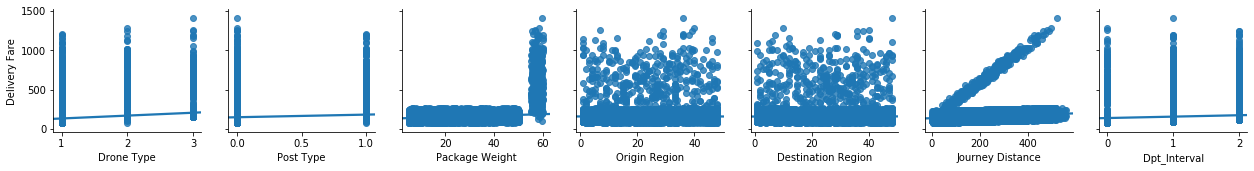

In [81]:
#EDA on Delivery price
sns.pairplot(new_test_df,x_vars=['Drone Type','Post Type','Package Weight',\
                             'Origin Region','Destination Region',\
                             'Journey Distance','Dpt_Interval'],y_vars='Delivery Fare',kind='reg')

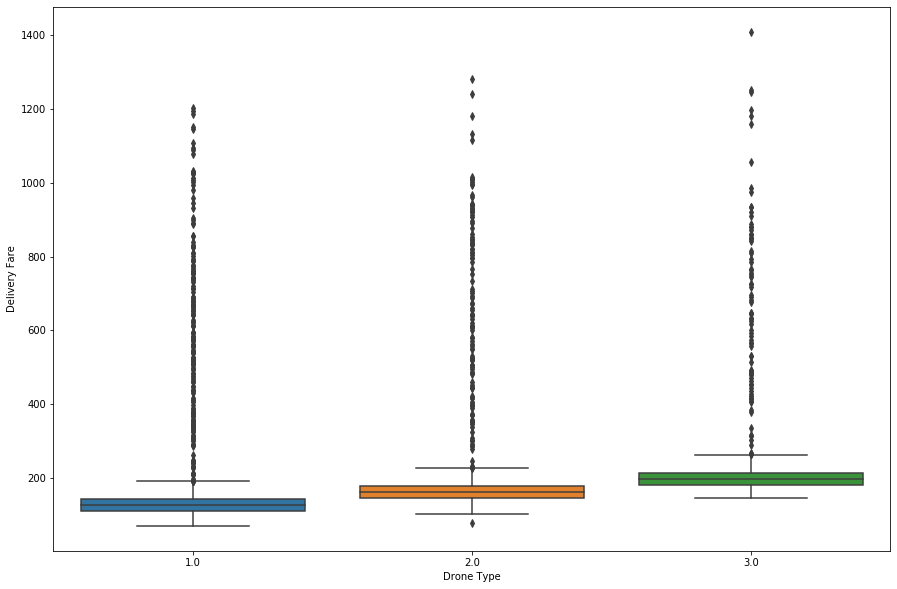

In [82]:
# Drone Type has still got some outliers
plt.rcParams['figure.figsize']=15,10
xi=new_test_df[['Delivery Fare','Drone Type']]
sns.boxplot(data=xi,x='Drone Type',y='Delivery Fare')

In [83]:
def treat_droneType_outliers(drone_type):

    sample_df=new_test_df.copy()
#     if option == "Origin":
        
    sample_df = sample_df[sample_df['Drone Type']==drone_type][["Delivery Fare", "Drone Type","Id"]]
        
#     else:
#     sample_df = sample_df[sample_df['Destination Region']==region_no]
    
    Q1 = sample_df.quantile(0.25)
    Q3 = sample_df.quantile(0.75)
    IQR = Q3 - Q1
#     print(Q1)
#     print(Q3)
    print(IQR)

    try:
        #clean
        clean = sample_df[~((sample_df < (Q1 - 1.5 * IQR)) |(sample_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#         print(clean)
        #outlier
        outliers = sample_df[((sample_df < (Q1 - 1.5 * IQR)) |(sample_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#         print(outliers)

    except :
        print("!!!!!")
        
    return clean,outliers

## 13-1 Seperating clean from outliers for Drone-Type: 1.0

In [84]:
clean_df_1,outlier_df_1 = treat_droneType_outliers(1.0)

Delivery Fare   32.865000
Drone Type       0.000000
dtype: float64


In [85]:
clean_df_1.head()

,Delivery Fare,Drone Type,Id
4,132.260000,1.000000,ID1767368003
5,150.620000,1.000000,ID1627205904
7,110.600000,1.000000,ID1720449532
9,141.830000,1.000000,ID1738336630
12,139.030000,1.000000,ID5704804569


In [86]:
outlier_df_1.head()

,Delivery Fare,Drone Type,Id
28,809.750000,1.000000,ID1309198845
601,346.860000,1.000000,ID5128349014
648,582.110000,1.000000,ID1508815773
900,325.730000,1.000000,ID5440855824
1058,470.950000,1.000000,ID5812408320


## 13-2 Seperating clean from outliers for Drone Type: 2.0

In [87]:
clean_df_2,outlier_df_2 = treat_droneType_outliers(2.0)

Delivery Fare   31.910000
Drone Type       0.000000
dtype: float64


In [88]:
clean_df_2.head()

,Delivery Fare,Drone Type,Id
8,129.070000,2.000000,ID1541523573
10,168.590000,2.000000,ID1391760737
16,203.680000,2.000000,ID5323834530
22,210.840000,2.000000,ID5154479116
23,165.490000,2.000000,ID5604588300


## 13-3 Seperating clean from outliers for Drone Type: 2.0

In [89]:
clean_df_3,outlier_df_3 = treat_droneType_outliers(3.0)

Delivery Fare   32.867500
Drone Type       0.000000
dtype: float64


## Combining all the clean and outliers respectively

In [90]:
clean_1 =new_test_df[new_test_df['Id'].isin(clean_df_1['Id'])]
clean_2 =new_test_df[new_test_df['Id'].isin(clean_df_2['Id'])]
clean_3 =new_test_df[new_test_df['Id'].isin(clean_df_3['Id'])]

out_1 =new_test_df[new_test_df['Id'].isin(outlier_df_1['Id'])]
out_2 =new_test_df[new_test_df['Id'].isin(outlier_df_2['Id'])]
out_3 =new_test_df[new_test_df['Id'].isin(outlier_df_3['Id'])]

final_cln_Drone_df = pd.concat([clean_1,clean_2,clean_3])
final_out_Drone_df = pd.concat([out_1,out_2,out_3])

In [91]:
final_cln_Drone_df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Journey Distance,New_DeliveryTime,Dpt_Interval
4,ID1767368003,1.000000,0.000000,39.495000,40.000000,11.000000,-37.952008,148.426079,-37.629604,144.048613,2018-07-21,19:59:06,393.210000,2:32:18,132.260000,386.712000,02:32:19,1
5,ID1627205904,1.000000,0.000000,46.987000,40.000000,17.000000,-38.249781,148.330524,-37.107149,144.140439,2018-04-01,00:43:58,396.900000,7:20:52,150.620000,390.409000,07:20:52,2
7,ID1720449532,1.000000,0.000000,41.746000,43.000000,5.000000,-38.111855,147.223251,-36.639687,147.743791,2018-03-21,13:07:03,176.720000,16:03:46,110.600000,170.223000,16:03:46,1
9,ID1738336630,1.000000,0.000000,31.278000,48.000000,15.000000,-37.216440,148.273685,-37.380458,144.920767,2018-05-09,05:23:10,303.940000,10:27:06,141.830000,297.451000,10:27:6,2
12,ID5704804569,1.000000,1.000000,8.311000,12.000000,43.000000,-38.819508,143.198526,-38.227166,147.132826,2018-05-08,11:21:48,355.390000,17:17:11,139.030000,348.893000,17:17:11,0


In [92]:
final_out_Drone_df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Journey Distance,New_DeliveryTime,Dpt_Interval
28,ID1309198845,1.000000,0.000000,57.543000,19.000000,11.000000,-38.548346,147.345642,-37.360047,144.069367,2018-06-05,11:29:43,323.000000,16:52:43,809.750000,316.509000,16:52:43,0
601,ID5128349014,1.000000,1.000000,55.646000,21.000000,17.000000,-37.836287,144.248257,-36.965332,144.277744,2018-01-26,18:49:49,103.480000,20:33:18,346.860000,96.987000,20:33:18,1
648,ID1508815773,1.000000,0.000000,58.986000,7.000000,33.000000,-37.548420,143.165514,-37.579303,145.448786,2018-02-22,13:39:16,207.990000,17:07:16,582.110000,201.496000,17:07:15,1
900,ID5440855824,1.000000,1.000000,59.643000,31.000000,41.000000,-38.145538,146.487156,-38.909101,146.167449,2018-02-18,11:41:27,95.940000,13:17:23,325.730000,89.441000,13:17:23,0
1058,ID5812408320,1.000000,1.000000,55.714000,15.000000,2.000000,-37.143730,144.994684,-38.162707,143.847773,2018-02-09,15:06:59,158.420000,17:45:24,470.950000,151.929000,17:45:24,1


## The below plot confirms that the outliers have been removed. Hence moving forward the 'final_cln_Drone_df' can be used for model building and disregard 'final_out_Drone_df'

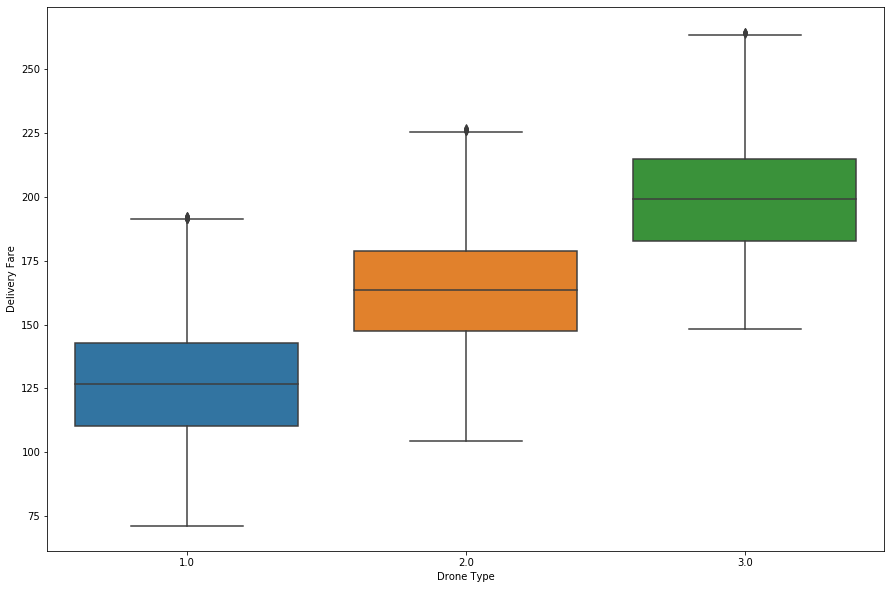

In [93]:
plt.rcParams['figure.figsize']=15,10
xi=final_cln_Drone_df[['Delivery Fare','Drone Type']]
sns.boxplot(data=xi,x='Drone Type',y='Delivery Fare')

In [94]:
final_cln_Drone_df.isnull().sum()

Id                        0
Drone Type                0
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            30
Journey Distance          0
New_DeliveryTime          0
Dpt_Interval              0
dtype: int64

------------------

 ## Splitting data
 * Splitting the data into train and test sample where the test sample will contain Null values of 'DeliveryFare'.
 * Furthermore the train data is used to build models.
 * Finally, based on the accuracy a model is selected to predict the test sample with Null values

In [95]:
train_sample = final_cln_Drone_df[final_cln_Drone_df["Delivery Fare"].notnull()]
test_sample = final_cln_Drone_df[final_cln_Drone_df["Delivery Fare"].isnull()]

## 14- Model Selection

## 14-1 Multiple Linear Regression:

In [96]:
x = train_sample.iloc[:, [1,2,3,-3,-1]].values
y = train_sample.iloc[:, [-4]].values

## Splitting data into train and test set

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 111)

## Training Multiple Linear Regression on train sample

In [98]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
y_pred = regressor.predict(x_test)

In [100]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)), axis = 1))

[[132.47 130.77]
 [153.2  149.76]
 [131.86 129.99]
 ...
 [118.56 121.63]
 [148.67 148.49]
 [164.08 162.38]]


## Model Evaluation

## Finding R-Square


In [101]:
print ('R-squared for Multiple Linear Regression model = ',regressor.score(x_test,y_test))

# Finding RMSE

print('\nRMSE for Multiple Linear Regression model=',np.sqrt(mean_squared_error(y_pred,y_test)))

R-squared for Multiple Linear Regression model =  0.9901596023854751

RMSE for Multiple Linear Regression model= 3.640395213292894


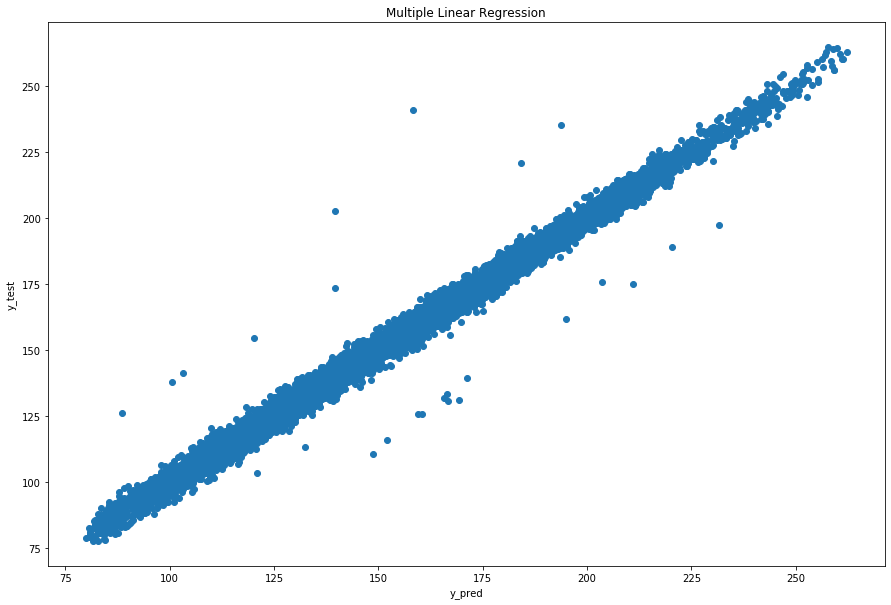

In [102]:
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Multiple Linear Regression')
plt.show()

----------------

## 14-2 RandomForest Regression:

In [103]:
from sklearn.model_selection import train_test_split

x_tr,x_t,y_tr,y_t = train_test_split(x,y, random_state = 11)

In [104]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg.fit(x_tr,y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [105]:
y_p = reg.predict(x_t)

In [106]:
np.set_printoptions(precision=2)
print(np.concatenate((y_p.reshape(len(y_p),1), y_t.reshape(len(y_p),1)), axis = 1))

[[118.79 119.49]
 [188.88 193.98]
 [103.11 103.66]
 ...
 [138.98 140.38]
 [104.36 110.5 ]
 [133.28 114.02]]


## Model Evaluation

## Finding R-Square

In [107]:
print ('R-squared for Random Forest model = ',regressor.score(x_t,y_t))

# Finding RMSE

print('\nRMSE for Random Forest model=',np.sqrt(mean_squared_error(y_p,y_t)))

R-squared for Random Forest model =  0.9914164914345166

RMSE for Random Forest model= 3.863527606996213


--------------

## 14-3 DecisionTree Regression:

In [108]:
x_tra,x_tst,y_tra,y_tst = train_test_split(x,y, random_state = 10)

In [109]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_tra,y_tra)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [110]:
y_pr = reg.predict(x_tst)

In [111]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pr.reshape(len(y_pr),1), y_tst.reshape(len(y_pr),1)), axis = 1))

[[140.56 142.95]
 [157.24 156.44]
 [143.9  147.22]
 ...
 [175.21 176.34]
 [172.92 172.43]
 [176.11 172.95]]


## Model Evaluation

## Finding R-Square

In [112]:
print ('R-squared for Decision Tree model = ',regressor.score(x_t,y_t))

# Finding RMSE

print('\nRMSE for Decision Tree model=',np.sqrt(mean_squared_error(y_p,y_t)))

R-squared for Decision Tree model =  0.99563778927488

RMSE for Decision Tree model= 3.863527606996213


------------

## 14-4 SVR:

In [113]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [114]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, random_state = 10)

In [115]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
Y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))

## Model Evaluation

## Finding R-Square

In [117]:
print ('R-squared for SVR model = ',regressor.score(X_test,Y_test))

# Finding RMSE

print('\nRMSE for SVR model=',np.sqrt(mean_squared_error(Y_pred,Y_test)))

R-squared for SVR model =  0.9908617947976563

RMSE for SVR model= 149.7072827105155


------------

## 15- Since the optimal model is observed to be as Multiple Linear Regression, it is further used to predict the actual null values of Delivery Fare

In [118]:
x = train_sample.iloc[:, [1,2,3,-3,-1]]
y = train_sample.iloc[:, [-4]]



x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 111)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
Del_fare = test_sample.iloc[:, [1,2,3,-3,-1]]

In [120]:
y_pred = regressor.predict(Del_fare)
test_sample.rename(columns = {"new_del_fare": "Delivery Fare"}, inplace=True)

In [121]:
cols = list(test_sample.columns.values)
cols

['Id',
 'Drone Type',
 'Post Type',
 'Package Weight',
 'Origin Region',
 'Destination Region',
 'Origin Latitude',
 'Origin Longitude',
 'Destination Latitude',
 'Destination Longitude',
 'Departure Date',
 'Departure Time',
 'Travel Time',
 'Delivery Time',
 'Delivery Fare',
 'Journey Distance',
 'New_DeliveryTime',
 'Dpt_Interval']

In [122]:


test_sample = test_sample[['Id',
 'Drone Type',
 'Post Type',
 'Package Weight',
 'Origin Region',
 'Destination Region',
 'Origin Latitude',
 'Origin Longitude',
 'Destination Latitude',
 'Destination Longitude',
 'Departure Date',
 'Departure Time',
 'Travel Time',
 'Delivery Time',
 'Delivery Fare',
 'Journey Distance',
 'New_DeliveryTime',
 'Dpt_Interval',
 ]]

In [123]:
test_sample.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Journey Distance,New_DeliveryTime,Dpt_Interval
187,ID1380085941,1.000000,0.000000,47.077000,34.000000,32.000000,-38.306746,146.622479,-36.514736,144.522918,2018-03-08,05:58:04,278.980000,10:37:02,nan,272.482000,10:37:3,2
620,ID5910070326,1.000000,1.000000,29.436000,1.000000,33.000000,-38.060625,143.245787,-37.418093,145.475103,2018-03-13,06:27:43,215.360000,10:03:05,nan,208.867000,10:03:5,0
6322,ID5482142482,1.000000,1.000000,26.675000,42.000000,5.000000,-37.589721,146.058724,-36.548497,147.680615,2018-07-06,20:18:10,191.380000,23:29:33,nan,184.891000,23:29:33,1
6338,ID5355258760,1.000000,1.000000,23.096000,7.000000,40.000000,-37.624573,142.937805,-38.139646,148.260817,2018-02-20,10:02:29,477.610000,18:00:05,nan,471.113000,18:00:6,0
6857,ID1440218655,1.000000,0.000000,18.870000,32.000000,28.000000,-36.719765,144.434845,-37.328926,147.870018,2018-07-11,15:25:27,319.210000,20:44:40,nan,312.715000,20:44:40,1


----------

## Updating main df with the predicted results

In [124]:
new_test_df.update(test_sample)

In [125]:
new_test_df[new_test_df["Id"]=="ID1380085941"]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Journey Distance,New_DeliveryTime,Dpt_Interval
187,ID1380085941,1.000000,0.000000,47.077000,34.000000,32.000000,-38.306746,146.622479,-36.514736,144.522918,2018-03-08,05:58:04,278.980000,10:37:02,nan,272.482000,10:37:3,2.000000


In [126]:
new_test_df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Journey Distance,New_DeliveryTime,Dpt_Interval
0,ID1155220853,3.000000,0.000000,29.246000,9.000000,8.000000,-37.543231,146.694631,-38.688709,147.836706,2018-07-07,03:32:59,141.790000,5:54:45,201.760000,162.058000,05:54:46,2.000000
1,ID1934229843,3.000000,0.000000,15.151000,23.000000,13.000000,-38.719744,143.924901,-36.816430,147.486725,2018-02-25,17:46:42,321.940000,23:08:39,202.880000,378.269000,23:08:38,1.000000
2,ID1516274046,3.000000,0.000000,24.750000,44.000000,45.000000,-38.181825,144.361734,-38.983453,144.674366,2018-06-15,13:34:05,84.490000,14:58:33,183.650000,93.289000,14:58:34,1.000000
3,ID1556088517,3.000000,0.000000,30.177000,32.000000,43.000000,-36.533097,144.367291,-37.965204,147.219601,2018-03-23,13:43:56,255.720000,17:59:39,193.090000,298.795000,17:59:39,1.000000
4,ID1767368003,1.000000,0.000000,39.495000,40.000000,11.000000,-37.952008,148.426079,-37.629604,144.048613,2018-07-21,19:59:06,393.210000,2:32:18,132.260000,386.712000,02:32:19,1.000000


----------------

## 16 - Conclusion:

   - 36987 rows are the final cleaned data out of total 37057 rows.
   - Origin Latitude: Total number of errors fixed: 20,
   - Destination Latitude: Total number of errors fixed: 20,
   - Destination Longitude: Total number of errors fixed 20,
   - Post Type: Total number of errors fixed: 20,
   - Journey Distance: Total number of errors: fixed: 14,
   - Both Origin and Destination regions are fixed, based on KNN model
       * Origin Region: Total number of errors fixed: 30,
       * Destination Region: Total number of errors fixed: 30,
   - Departure Date: Total number of errors fixed: 220,
   - Drone Type: Total number of errors fixed: 36,
   - Travel Time: Total number of errors fixed: 40,
   - Delivery Fare: Total number of errors fixed: 30
   - Duplicated rows and Id=nulls are dropped
        Null_Id: Total number of errors fixed: 23
   - Departure Time: Total number of errors fixed: 40,
   - Finally, Delivery Fare is calculated based on Multiple Linear Regression model

## 17- References:
- 5 - https://codereview.stackexchange.com/questions/200176/cleaning-up-date-strings-in-python
- 5 - https://stackoverflow.com/questions/16870663/how-do-i-validate-a-date-string-format-in-python
- 9 - https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
- 10-1,10-8 - https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- 10-5,10-9 - https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/